In [362]:
import pandas as pandas
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import numpy as np

In [363]:
loyalty_members = pandas.read_csv("../dataset/loyalty_members_2000.csv")
loyalty_points_activity = pandas.read_csv("../dataset/loyalty_points_activity_2000.csv")
online_customers = pandas.read_csv("../dataset/online_customers_2000.csv")
online_orders = pandas.read_csv("../dataset/online_orders_2000.csv")
pos_products = pandas.read_csv("../dataset/pos_products_1000.csv")
pos_transactions = pandas.read_csv("../dataset/pos_transactions_header_1000_v2.csv")
pos_transactions_line = pandas.read_csv("../dataset/pos_transactions_line_2000.csv")

In [366]:
# 1. Ensure the column is datetime (using dayfirst=True to avoid errors)
pos_transactions["trans_datetime"] = pandas.to_datetime(pos_transactions["trans_datetime"], dayfirst=True)
online_orders["order_datetime"] = pandas.to_datetime(online_orders["order_datetime"],dayfirst=True)
# 2. Extract the hour (0-23)
hours = pos_transactions["trans_datetime"].dt.hour
hours_online = online_orders["order_datetime"].dt.hour
month = pos_transactions["trans_datetime"].dt.month
month_online = online_orders["order_datetime"].dt.month

# 3. Define the bin edges and labels
# Bins: 0-6, 6-12, 12-18, 18-24
bins = [0, 6, 12, 18, 24]
labels = ['00:00-06:00', '06:00-12:00', '12:00-18:00', '18:00-24:00']
month_bins = [0,1,2,3,4,5,6,7,8,9,10,11,12]
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

# 4. Create the range column
# right=False means the range is [start, end), so 06:00 falls into the second bin
pos_transactions["time_range"] = pandas.cut(hours, bins=bins, labels=labels, right=False)
online_orders["time_range"] = pandas.cut(hours_online,bins=bins,labels=labels,right=False)
pos_transactions['month'] = pandas.cut(month,bins=month_bins,labels=month_labels,right=True,ordered=False)


In [374]:
del pos_transactions["Unnamed: 6"]

In [376]:
# Merging Datasets
# POS_Transactions and Loyalty_Members on loyalty_member_id creates a dataset of loyal members with their transactions
# Online_orders and Online Customers on online_customer_id creates a dataset of online customers with their online orders
# Loyalty_members and Loyalty Points on loyalty_member_id creates a dataset that tracks the loyal members and their point activity

pos_merged_with_members = pos_transactions.merge(right=loyalty_members,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
online_merged = online_customers.merge(right=upandasated_online_orders,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
loyalty_merged = loyalty_members.merge(right=loyalty_points_activity,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
pos_transactions_line_merged = pos_transactions.merge(right=pos_transactions_line,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
line_products = pos_products.merge(right=pos_transactions_line,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)

In [378]:
# Cleaning Data: Removing null values
pos_merged_with_members.dropna()
online_merged.dropna()
loyalty_merged.dropna()

,loyalty_member_id,enrolment_date,first_name,last_name,email,date_of_birth,gender,primary_store_id,consent_marketing,points_txn_id,source_system,source_reference,activity_type,points,activity_datetime
0,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,70069,ONLINE,82647,Redeem,-26,25/04/2024 23:35
1,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,70188,ONLINE,94176,Redeem,-48,16/04/2024 20:22
2,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,70328,ONLINE,83068,Adjust,2,13/02/2024 19:02
3,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,71390,ONLINE,82034,Earn,21,24/02/2024 15:27
4,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,71996,POS,84674,Earn,47,28/02/2024 13:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,70670,ONLINE,92563,Redeem,-17,26/03/2024 20:49
1996,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,70791,ONLINE,90556,Adjust,-16,19/01/2024 10:32
1997,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,71079,ONLINE,88591,Adjust,4,10/01/2024 20:29
1998,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,71136,ONLINE,86775,Adjust,14,25/01/2024 15:09


In [379]:
# Cleaning Data: Removing Duplicate Data
pos_merged_with_members.drop_duplicates()
online_merged.drop_duplicates()
loyalty_merged.drop_duplicates()
loyalty_members.drop_duplicates()
loyalty_points_activity.drop_duplicates()
online_customers.drop_duplicates()
online_orders.drop_duplicates()
pos_products.drop_duplicates()
pos_transactions .drop_duplicates()


,store_id,trans_datetime,staff_id,payment_type,order_channel,loyalty_member_id,pos_receipt_id,time_range,month
0,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan
1,1,2024-03-17 07:44:00,5007,Mobile Wallet,Click-and-Collect,3001.0,90143,06:00-12:00,Mar
2,2,2024-01-15 12:47:00,5006,Mobile Wallet,In-Store,3003.0,90433,12:00-18:00,Jan
3,4,2024-01-01 03:38:00,5002,Voucher,In-Store,3001.0,90617,00:00-06:00,Jan
4,4,2024-01-29 17:07:00,5002,Card,In-Store,3003.0,90460,12:00-18:00,Jan
...,...,...,...,...,...,...,...,...,...
995,1,2024-02-25 00:20:00,5004,Voucher,Click-and-Collect,NaN,90632,00:00-06:00,Feb
996,1,2024-02-20 22:01:00,5002,Cash,In-Store,NaN,90368,18:00-24:00,Feb
997,1,2024-01-26 15:28:00,5007,Voucher,Click-and-Collect,3004.0,90189,12:00-18:00,Jan
998,5,2024-01-17 07:34:00,5009,Voucher,In-Store,NaN,90198,06:00-12:00,Jan


In [380]:
# Exporting Datasets
pos_merged_with_members.to_csv("../dataset/pos_merged_with_members.csv",index=False)
online_merged.to_csv("../dataset/online_merged.csv",index=False)
loyalty_merged.to_csv("../dataset/loyalty_merged.csv",index=False)
pos_transactions_line_merged.to_csv("../dataset/pos_transactions_line_products.csv",index=False)


In [381]:
# How do in-store vs online sales compare by time, product and location?
most_purchased_product = pos_transactions_line.groupby("product_id").size()
pos_products_with_purchase_rate = pos_products.copy()

pos_products_with_purchase_rate["number_of_purchases"] = pos_products_with_purchase_rate["product_id"].map(most_purchased_product)
pos_products_with_purchase_rate.sort_values(by="number_of_purchases",ascending=False).head(5).to_csv("../results/most_purchases_pos_product.csv",index=False)

In [382]:
# How do in-store vs online sales compare by time, product and location?
pos_transactions_line_merged["amount_received"] = (pos_transactions_line_merged["unit_price"] * pos_transactions_line_merged["quantity"]) - pos_transactions_line_merged["line_discount"]        
amount_received = pos_transactions_line_merged.groupby("store_id")["amount_received"].sum() 

                                             
most_purchased_product_online = online_orders.groupby("product_id").size()
pos_products_with_purchase_rate_online = online_orders.copy()

# Collect all completed orders only
orders = pos_products_with_purchase_rate_online["order_status"] == "Completed" 
jump = pos_products_with_purchase_rate_online[orders]
pos_products_with_purchase_rate_online = jump

pos_products_with_purchase_rate_online["number_of_purchases"] = pos_products_with_purchase_rate_online["product_id"].map(most_purchased_product)
pos_products_with_purchase_rate_online.sort_values(by="number_of_purchases",ascending=False).head(14).to_csv("../results/most_purchases_online_product.csv",index=False)

In [384]:
# 1. Ensure the column is datetime (using dayfirst=True to avoid errors)
pos_transactions["trans_datetime"] = pandas.to_datetime(pos_transactions["trans_datetime"], dayfirst=True)
online_orders["order_datetime"] = pandas.to_datetime(online_orders["order_datetime"],dayfirst=True)
# 2. Extract the hour (0-23)
hours = pos_transactions["trans_datetime"].dt.hour
hours_online = online_orders["order_datetime"].dt.hour

# 3. Define the bin edges and labels
# Bins: 0-6, 6-12, 12-18, 18-24
bins = [0, 6, 12, 18, 24]
labels = ['00:00-06:00', '06:00-12:00', '12:00-18:00', '18:00-24:00']

# 4. Create the range column
# right=False means the range is [start, end), so 06:00 falls into the second bin
pos_transactions["time_range"] = pandas.cut(hours, bins=bins, labels=labels, right=False)
online_orders["time_range"] = pandas.cut(hours_online,bins=bins,labels=labels,right=False)


In [ ]:
# Count the number of transactions per range
range_counts_transactions = pos_transactions.groupby("time_range", observed=False).size()
range_counts_online = online_orders.groupby("time_range",observed=False).size()


time_range
00:00-06:00    270
06:00-12:00    248
12:00-18:00    254
18:00-24:00    228
dtype: int64
time_range
00:00-06:00    497
06:00-12:00    504
12:00-18:00    506
18:00-24:00    493
dtype: int64


In [386]:
# How does loyalty programme affect customer spend, visit frequency, and channel preference
# Tracks all online members visits 
average_discount_by_online_customer = online_merged.groupby('online_customer_id')['discount_amount'].mean()
average_discount_by_channel_preferance = online_merged.groupby('sales_channel')['discount_amount'].mean()
average_discount = online_merged['discount_amount'].mean()

visit_frequency_of_online_customers = online_merged.groupby('email').size()

visit_per_online_customer = online_merged[['email','sales_channel','discount_amount','delivery_fee']].copy()
visit_per_online_customer['points'] = loyalty_points_activity['points']
visit_per_online_customer['vists'] = visit_per_online_customer['email'].map(visit_frequency_of_online_customers)
visit_per_online_customer.head()
visit_per_online_customer.to_csv('../results/visit_per_online_customer.csv',index=False)

In [387]:
# How does loyalty programme affect customer spend, visit frequency, and channel preference
# Tracks th number of visits for each loyal pos member
visit_frequency_of_pos_customers = pos_merged_with_members.groupby('email').size()

visit_per_pos_customer = pos_merged_with_members[['email','order_channel']].copy()
visit_per_pos_customer['points'] = loyalty_points_activity['points']
visit_per_pos_customer['vists'] = visit_per_pos_customer['email'].map(visit_frequency_of_online_customers)
visit_per_pos_customer.head()
visit_per_pos_customer.to_csv('../results/visit_per_pos_customer.csv',index=False)

In [388]:
# 1. Combine all visit counts across both platforms
all_visits = pandas.concat([visit_frequency_of_pos_customers, visit_frequency_of_online_customers])
# 2. Group by email again to sum visits if a customer is in both POS and Online
total_visit_freq = all_visits.groupby(level=0).sum()

# 3. Now map using the integrated frequency
visit_per_pos_customer['vists'] = visit_per_pos_customer['email'].map(total_visit_freq)

In [389]:
# Tracking the visits of Online sales and visits
is_member = online_merged['loyalty_member_id'].notnull()
is_not_members = online_merged['loyalty_member_id'].isna()
non_online_members = online_merged[is_not_members]
online_members = online_merged[is_member]
print('Non online Loyalty members',non_online_members.count())
print('Online Loyalty members',online_members.count())


Non online Loyalty members online_customer_id    716
first_name            716
last_name             716
email                 716
phone                 716
city                  716
loyalty_member_id       0
online_order_id       716
order_datetime        716
order_status          716
sales_channel         716
fulfilment_type       716
store_id              716
delivery_fee          716
discount_amount       716
payment_type          716
product_id            716
dtype: int64
Online Loyalty members online_customer_id    1284
first_name            1284
last_name             1284
email                 1284
phone                 1284
city                  1284
loyalty_member_id     1284
online_order_id       1284
order_datetime        1284
order_status          1284
sales_channel         1284
fulfilment_type       1284
store_id              1284
delivery_fee          1284
discount_amount       1284
payment_type          1284
product_id            1284
dtype: int64


In [390]:
# Tracking the visits of POS sales and visits
is_member = pos_transactions['loyalty_member_id'].notnull()
is_not_members = pos_transactions['loyalty_member_id'].isna()
non_pos_members = pos_transactions[is_not_members]
pos_members = pos_transactions[is_member]
print('Non-pos Loyalty members',non_pos_members.count())
print('Pos Loyalty members',pos_members.count())

Non-pos Loyalty members store_id             367
trans_datetime       367
staff_id             367
payment_type         367
order_channel        367
loyalty_member_id      0
pos_receipt_id       367
time_range           367
month                367
dtype: int64
Pos Loyalty members store_id             633
trans_datetime       633
staff_id             633
payment_type         633
order_channel        633
loyalty_member_id    633
pos_receipt_id       633
time_range           633
month                633
dtype: int64


C:\Users\kumbi\AppData\Local\Temp\ipykernel_12860\2213944741.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loyalty_status', y='vists', data=loyalty_metrics, ax=ax1, palette='Blues_d', alpha=0.7)


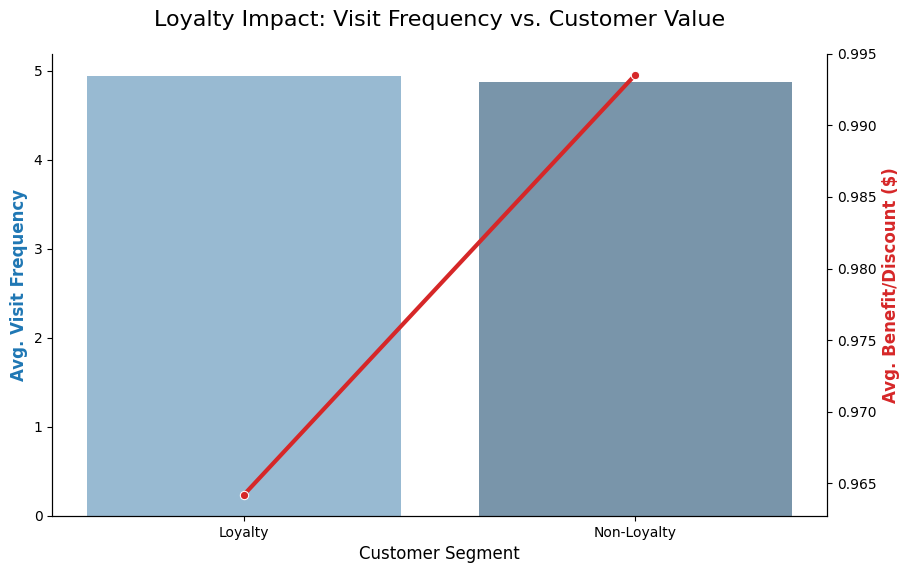

In [391]:
import pandas as pandas
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prep the Loyalty Status (assuming points > 0 = Loyalty)
# visit_per_online_customer = pandas.read_csv('../results/visit_per_online_customer.csv')
visit_per_online_customer['loyalty_status'] = visit_per_online_customer['points'].apply(lambda x: 'Loyalty' if x > 0 else 'Non-Loyalty')

# 2. Calculate Aggregates
loyalty_metrics = visit_per_online_customer.groupby('loyalty_status').agg({
    'vists': 'mean',
    'discount_amount': 'mean'
}).reset_index()

# 3. Create the Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary Axis: Visit Frequency
sns.barplot(x='loyalty_status', y='vists', data=loyalty_metrics, ax=ax1, palette='Blues_d', alpha=0.7)
ax1.set_ylabel('Avg. Visit Frequency', fontsize=12, fontweight='bold', color='#1f77b4')
ax1.set_xlabel('Customer Segment', fontsize=12)

# Secondary Axis: Spend/Discount
ax2 = ax1.twinx()
sns.lineplot(x='loyalty_status', y='discount_amount', data=loyalty_metrics, ax=ax2, marker='o', color='#d62728', linewidth=3)
ax2.set_ylabel('Avg. Benefit/Discount ($)', fontsize=12, fontweight='bold', color='#d62728')

plt.title("Loyalty Impact: Visit Frequency vs. Customer Value", fontsize=16, pad=20)
sns.despine(right=False)
plt.show()

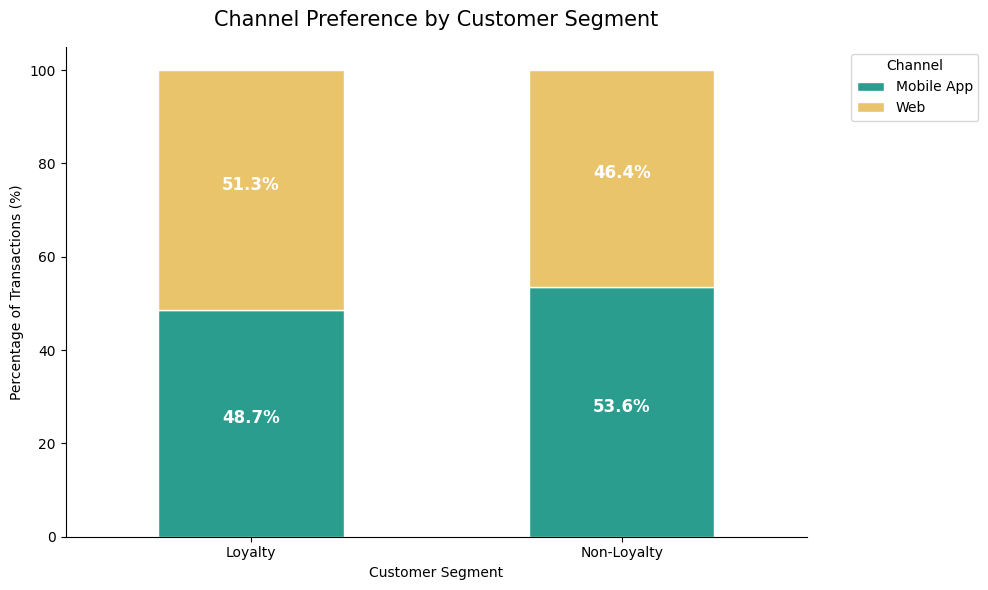

In [392]:
# 1. Create a cross-tabulation of loyalty status and channel
channel_pref = pandas.crosstab(visit_per_online_customer['loyalty_status'], 
                           visit_per_online_customer['sales_channel'], 
                           normalize='index') * 100

# 2. Plotting
channel_pref.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2a9d8f', '#e9c46a'], edgecolor='white')

plt.title("Channel Preference by Customer Segment", fontsize=15, pad=15)
plt.ylabel("Percentage of Transactions (%)")
plt.xlabel("Customer Segment")
plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Add percentage labels on the bars for clarity
for n, x in enumerate([*channel_pref.index.values]):
    for (proportion, y_loc) in zip(channel_pref.loc[x], channel_pref.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion / 2), s=f'{np.round(proportion, 1)}%', 
                 color="white", fontsize=12, fontweight="bold", ha="center")

sns.despine()
plt.tight_layout()
plt.show()

In [393]:
# Which products and stores are most profitable, and which need attention?
products_unit_price = pos_products.groupby('category')['unit_cost'].mean().round(2)
products_list_price = pos_products.groupby('category')['list_price'].mean().round(2)
profitability_per_product = (products_list_price - products_unit_price).round(2)

expected_profits_by_category = pos_products[['category','unit_cost','list_price']]

expected_profits_by_category['list_price'] = expected_profits_by_category['category'].map(products_list_price)

expected_profits_by_category['unit_cost'] = expected_profits_by_category['category'].map(products_unit_price)
print("Average Unit Cost per Category:")
print(products_unit_price)
print("\nAverage List Price per Category:")
print(products_list_price)
print("\nProfitability per Category:")
print(profitability_per_product)

expected_profits_by_category.duplicated()
expected_profits_by_category.drop_duplicates()
expected_profits_by_category.to_csv('../results/expected_profits_by_category.csv',index=False)


Average Unit Cost per Category:
category
Coffee         1.74
Food           1.74
Merchandise    1.69
Tea            1.79
Name: unit_cost, dtype: float64

Average List Price per Category:
category
Coffee         4.46
Food           4.54
Merchandise    4.53
Tea            4.64
Name: list_price, dtype: float64

Profitability per Category:
category
Coffee         2.72
Food           2.80
Merchandise    2.84
Tea            2.85
dtype: float64


C:\Users\kumbi\AppData\Local\Temp\ipykernel_12860\124837431.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_profits_by_category['list_price'] = expected_profits_by_category['category'].map(products_list_price)
C:\Users\kumbi\AppData\Local\Temp\ipykernel_12860\124837431.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_profits_by_category['unit_cost'] = expected_profits_by_category['category'].map(products_unit_price)


In [394]:
# Which products and stores are most profitable, and which need attention?
products_unit_price = pos_products.groupby('product_name')['unit_cost'].mean().round(2)
products_list_price = pos_products.groupby('product_name')['list_price'].mean().round(2)
profitability_per_product = (products_list_price - products_unit_price).round(2)

expected_profits_per_product = pos_products[['category','product_name','unit_cost','list_price']].copy()

print("Average Unit Cost per Product:")
print(products_unit_price.head())
print("\nAverage List Price per Product:")
print(products_list_price.head())
print("\nMost Profitable Products:")
print(profitability_per_product.head())
print("\n Least Profitable Proucts")
print(profitability_per_product.tail())

expected_profits_per_product['profitability'] = expected_profits_per_product['product_name'].map(profitability_per_product)

expected_profits_per_product.to_csv("../results/profitabilty_of_products.csv",index=False)
expected_profits_per_product.sort_values(by='profitability',ascending=False).head().to_csv("../results/most_profitbale_products.csv",index=False)
expected_profits_per_product.sort_values(by='profitability',ascending=False).tail().to_csv("../results/least_profitable_products.csv",index=False)

Average Unit Cost per Product:
product_name
Black Tea      1.52
Black Tea L    1.83
Black Tea M    1.83
Black Tea S    1.68
Cake           1.68
Name: unit_cost, dtype: float64

Average List Price per Product:
product_name
Black Tea      4.40
Black Tea L    4.63
Black Tea M    4.45
Black Tea S    3.87
Cake           4.33
Name: list_price, dtype: float64

Most Profitable Products:
product_name
Black Tea      2.88
Black Tea L    2.80
Black Tea M    2.62
Black Tea S    2.19
Cake           2.65
dtype: float64

 Least Profitable Proucts
product_name
Pastry      2.80
Salad       2.82
Sandwich    2.87
Tumbler     2.70
Wrap        2.82
dtype: float64


C:\Users\kumbi\AppData\Local\Temp\ipykernel_12860\4031831038.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='profitability', y='product_name', palette=colors)
C:\Users\kumbi\AppData\Local\Temp\ipykernel_12860\4031831038.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=comparison_df, x='profitability', y='product_name', palette=colors)


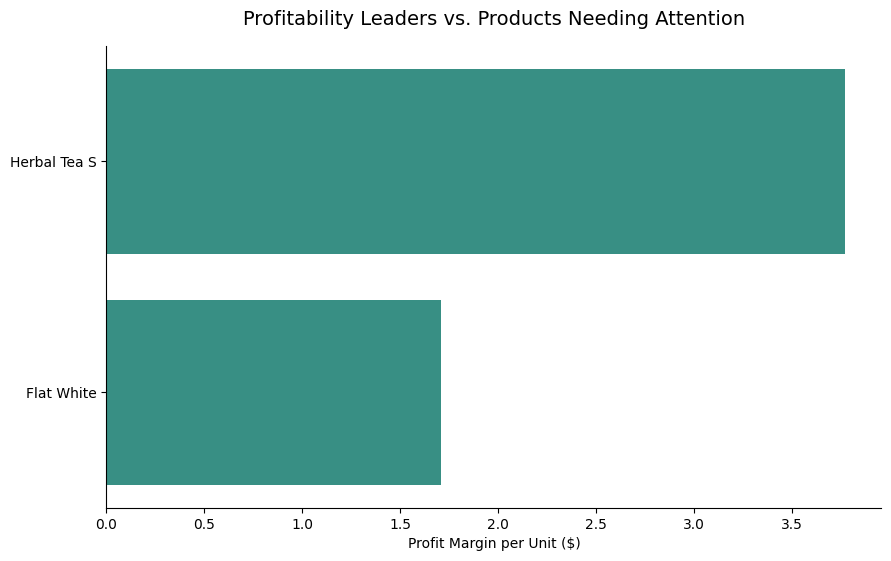

In [395]:
# Prepare Data
top_5 = expected_profits_per_product.sort_values(by='profitability', ascending=False).head(5)
bottom_5 = expected_profits_per_product.sort_values(by='profitability', ascending=False).tail(5)
comparison_df = pandas.concat([top_5, bottom_5])

# Plot
plt.figure(figsize=(10, 6))
colors = ['#2a9d8f' if x > comparison_df['profitability'].mean() else '#e76f51' for x in comparison_df['profitability']]

sns.barplot(data=comparison_df, x='profitability', y='product_name', palette=colors)

plt.title("Profitability Leaders vs. Products Needing Attention", fontsize=14, pad=15)
plt.xlabel("Profit Margin per Unit ($)")
plt.ylabel("")
sns.despine()
plt.show()

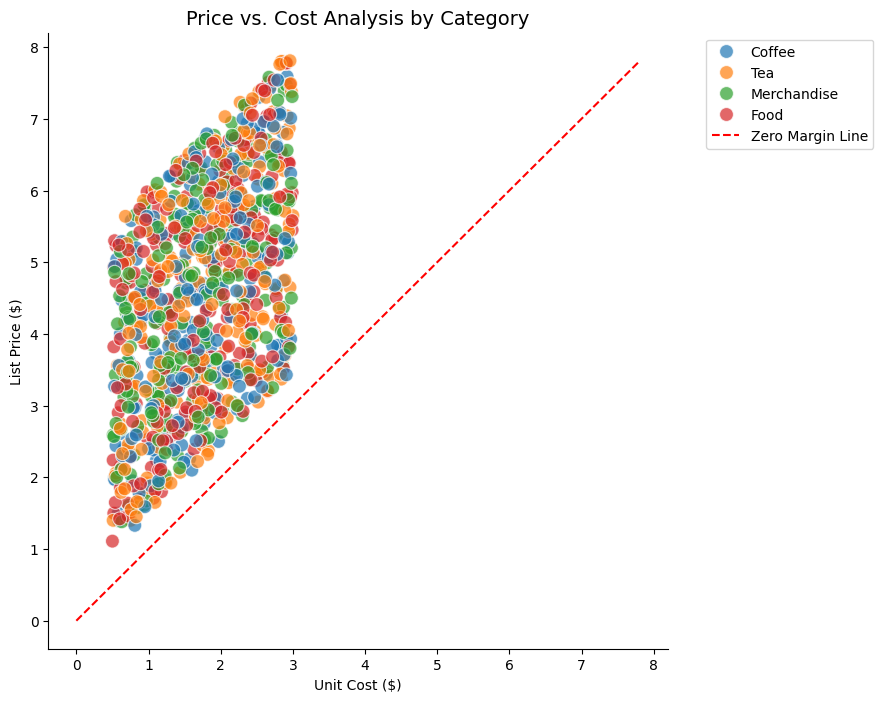

In [396]:
plt.figure(figsize=(8, 8))

# Scatter plot
sns.scatterplot(data=expected_profits_per_product, x='unit_cost', y='list_price', 
                hue='category', s=100, alpha=0.7)

# 45-degree line (Break-even line if cost = price)
line_max = expected_profits_per_product['list_price'].max()
plt.plot([0, line_max], [0, line_max], color='red', linestyle='--', label='Zero Margin Line')

plt.title("Price vs. Cost Analysis by Category", fontsize=14)
plt.xlabel("Unit Cost ($)")
plt.ylabel("List Price ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.show()

C:\Users\kumbi\AppData\Local\Temp\ipykernel_12860\2292495176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=expected_profits_per_product, x='category', y='profitability',


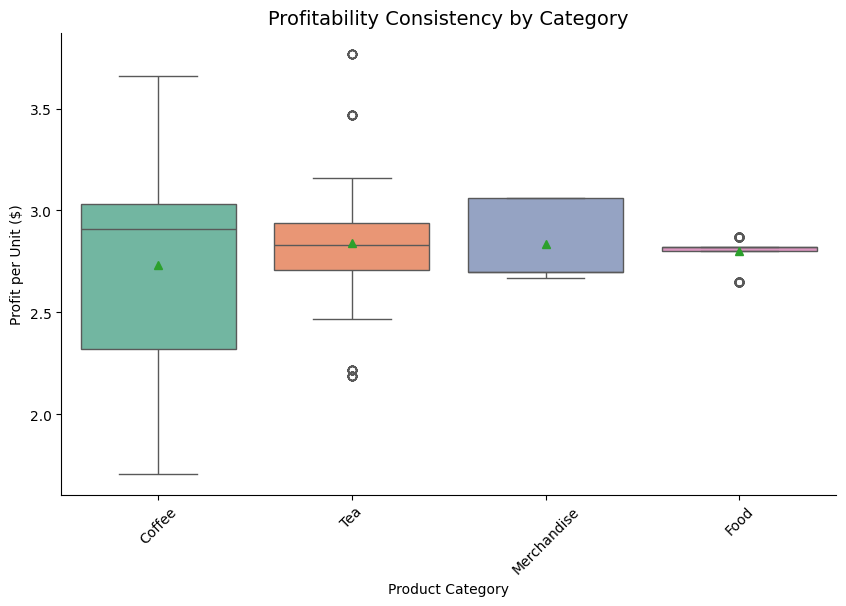

In [397]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=expected_profits_per_product, x='category', y='profitability', 
            palette="Set2", showmeans=True)

plt.title("Profitability Consistency by Category", fontsize=14)
plt.ylabel("Profit per Unit ($)")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
sns.despine()
plt.show()

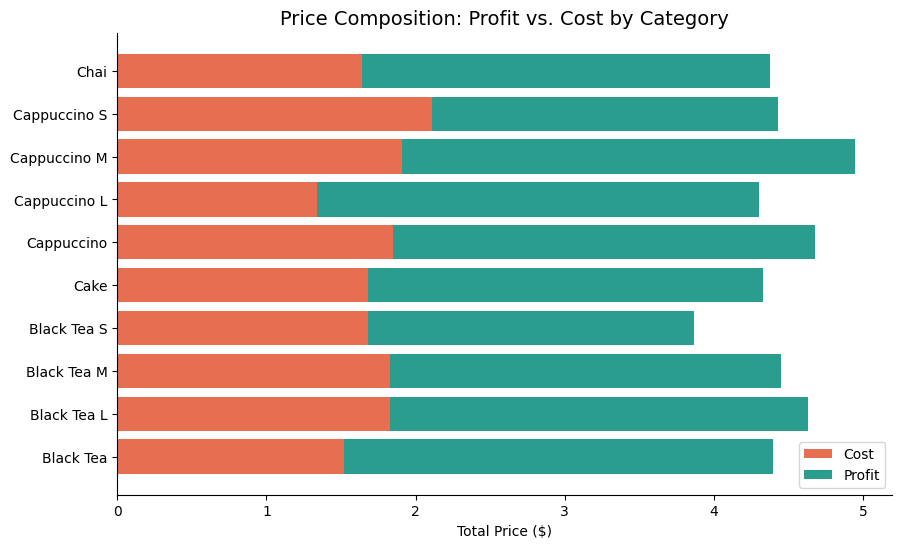

In [398]:
# Preparing the data from your variables
plot_df = pandas.DataFrame({
    'Category': products_unit_price.index,
    'Unit Cost': products_unit_price.values,
    'Profit': profitability_per_product.values
}).head(10)

# Plotting
plt.figure(figsize=(10, 6))
p1 = plt.barh(plot_df['Category'], plot_df['Unit Cost'], color='#e76f51', label='Cost')
p2 = plt.barh(plot_df['Category'], plot_df['Profit'], left=plot_df['Unit Cost'], color='#2a9d8f', label='Profit')

plt.title("Price Composition: Profit vs. Cost by Category", fontsize=14)
plt.xlabel("Total Price ($)")
plt.legend(loc='lower right')
sns.despine()
plt.show()

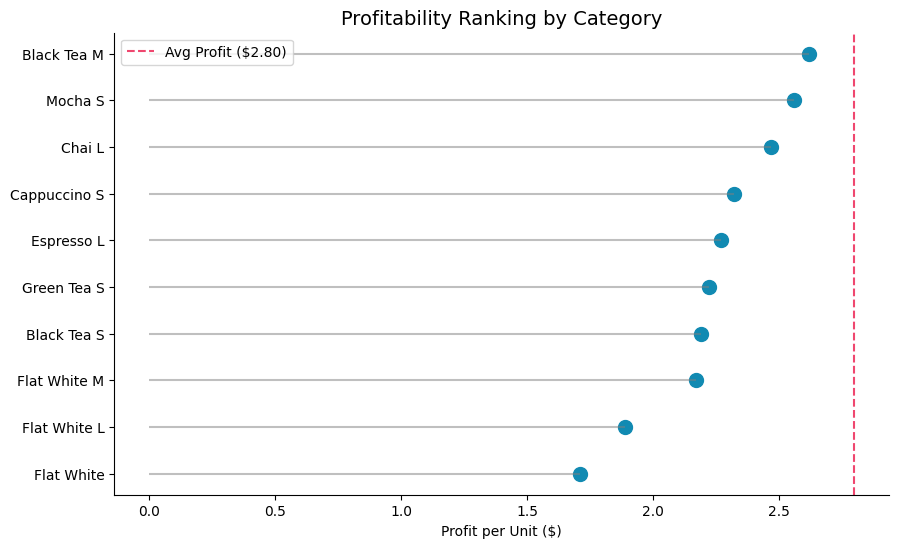

In [399]:
# Calculate the average profit across all categories
mean_profit = profitability_per_product.mean()

plt.figure(figsize=(10, 6))
# Sort for aesthetic appeal
sorted_profit = profitability_per_product.sort_values().head(10)

plt.hlines(y=sorted_profit.index, xmin=0, xmax=sorted_profit.values, color='grey', alpha=0.5)
plt.scatter(y=sorted_profit.index, x=sorted_profit.values, color='#118ab2', s=100)

# Add the "Attention" line
plt.axvline(x=mean_profit, color='#ef476f', linestyle='--', label=f'Avg Profit (${mean_profit:.2f})')

plt.title("Profitability Ranking by Category", fontsize=14)
plt.xlabel("Profit per Unit ($)")
plt.legend()
sns.despine()
plt.show()

In [400]:
pos_transactions_line_merged.head()

,store_id,trans_datetime,staff_id,payment_type,order_channel,loyalty_member_id,pos_receipt_id,time_range,month,line_number,product_id,quantity,unit_price,line_discount,amount_received
0,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,2,115,1,4.84,0.10,4.74
1,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,3,811,1,1.84,0.50,1.34
2,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,3,32,4,5.50,0.25,21.75
3,1,2024-03-17 07:44:00,5007,Mobile Wallet,Click-and-Collect,3001.0,90143,06:00-12:00,Mar,5,755,1,4.55,0.00,4.55
4,1,2024-03-17 07:44:00,5007,Mobile Wallet,Click-and-Collect,3001.0,90143,06:00-12:00,Mar,4,649,3,2.59,0.10,7.67


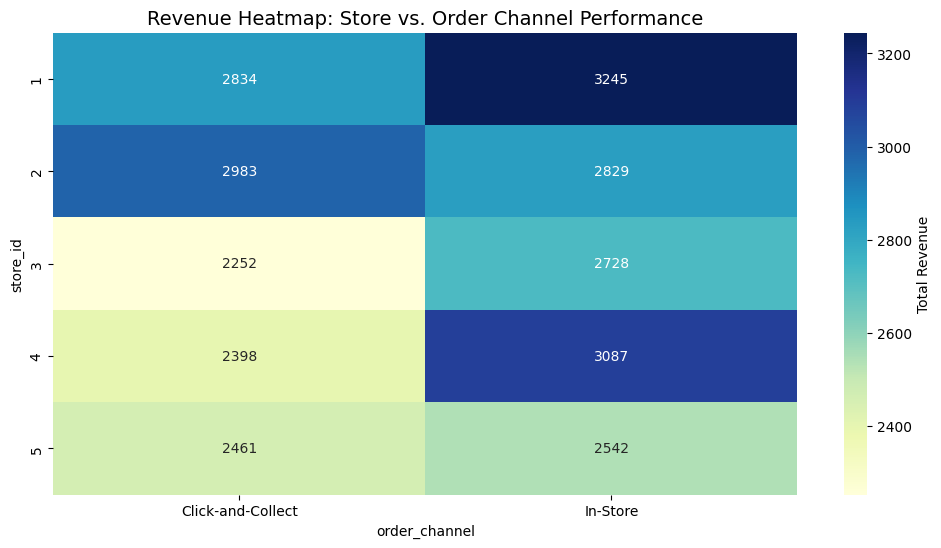

In [401]:
store_category_profit = pos_transactions_line_merged.pivot_table(
    index='store_id', 
    columns='order_channel', 
    values='amount_received', 
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
sns.heatmap(store_category_profit, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total Revenue'})

plt.title("Revenue Heatmap: Store vs. Order Channel Performance", fontsize=14)
plt.show()

In [402]:
line_products["profit"] = line_products["list_price"] - line_products["unit_cost"]


In [403]:
pos_transactions_line_merged["amount_received"] = (pos_transactions_line_merged["unit_price"] * pos_transactions_line_merged["quantity"]) - pos_transactions_line_merged["line_discount"]        
amount_received = pos_transactions_line_merged.groupby("store_id")["amount_received"].sum() 

                                             

In [404]:
# Visualisations for Sales by channel, store, product, and time.
# POS Sales
pos_sales_channel = pos_transactions_line_merged.groupby("order_channel")["amount_received"].sum()
pos_sales_store = pos_transactions_line_merged.groupby("store_id")["amount_received"].sum()
pos_sales_product = pos_transactions_line_merged.groupby("product_id")["amount_received"].sum()
pos_sales_time = pos_transactions_line_merged.groupby("month")["amount_received"].sum()


C:\Users\kumbi\AppData\Local\Temp\ipykernel_12860\2990405646.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pos_sales_time = pos_transactions_line_merged.groupby("month")["amount_received"].sum()


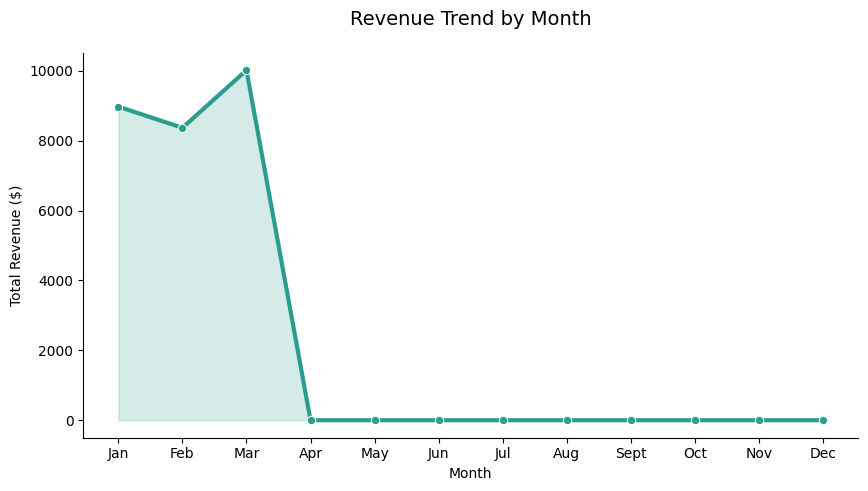

In [405]:
plt.figure(figsize=(10, 5))
# Converting categorical month to numeric for a smooth line
sns.lineplot(x=pos_sales_time.index, y=pos_sales_time.values, marker='o', color='#2a9d8f', linewidth=3)
plt.fill_between(pos_sales_time.index, pos_sales_time.values, color='#2a9d8f', alpha=0.2)

plt.title("Revenue Trend by Month", fontsize=14, pad=20)
plt.ylabel("Total Revenue ($)")
plt.xlabel("Month")
sns.despine()
plt.show()

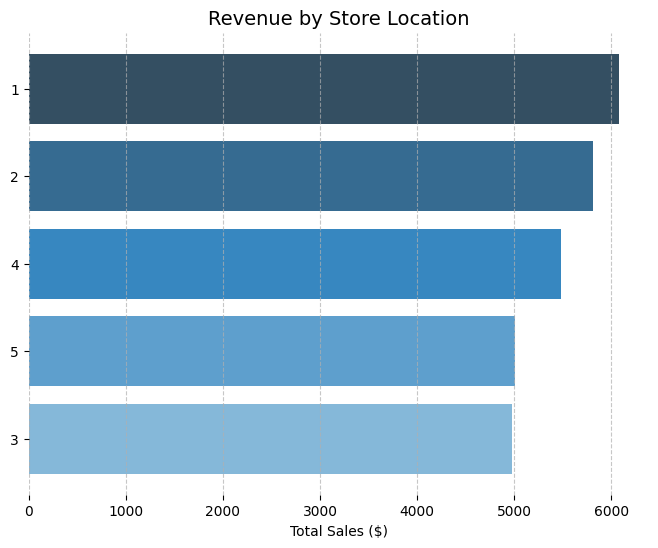

In [406]:
plt.figure(figsize=(8, 6))
# Sorting ensures the highest-performing store is at the top
store_data = pos_sales_store.sort_values(ascending=True)

colors = sns.color_palette("Blues_d", len(store_data))
plt.barh(store_data.index.astype(str), store_data.values, color=colors)

plt.title("Revenue by Store Location", fontsize=14)
plt.xlabel("Total Sales ($)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.show()

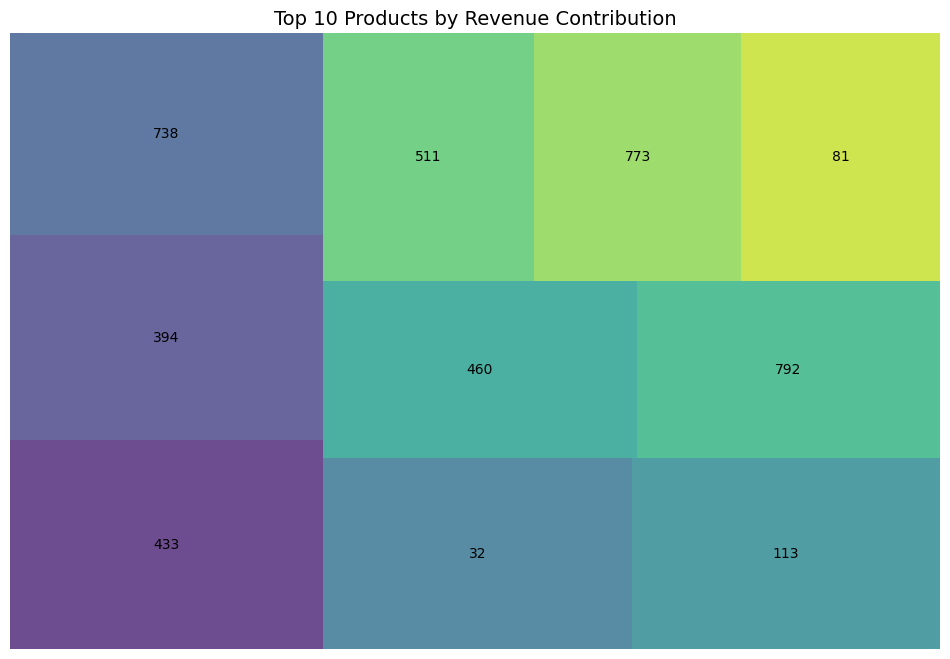

In [407]:
plt.figure(figsize=(12, 8))
# Get top 10 products to keep it clean
top_products = pos_sales_product.sort_values(ascending=False).head(10)

squarify.plot(sizes=top_products.values, label=top_products.index, 
              color=sns.color_palette("viridis", len(top_products)), alpha=0.8)

plt.title("Top 10 Products by Revenue Contribution", fontsize=14)
plt.axis('off')
plt.show()

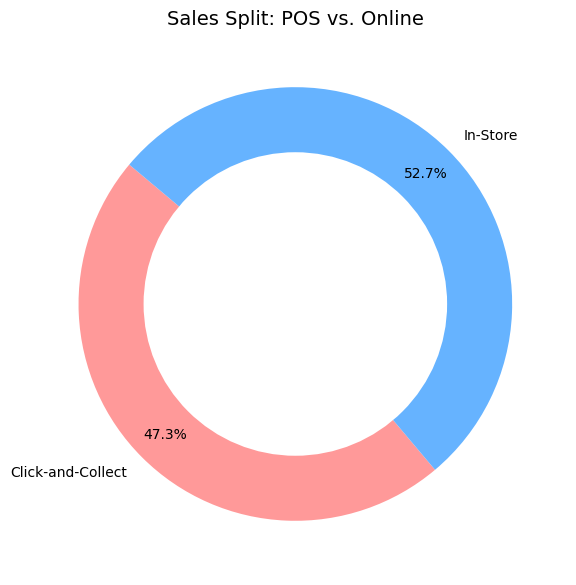

In [408]:
plt.figure(figsize=(6, 6))
data = pos_sales_channel
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, 
        colors=['#ff9999','#66b3ff'], pctdistance=0.85, wedgeprops={'width': 0.4})

# Add a circle in the middle to make it a donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Sales Split: POS vs. Online", fontsize=14)
plt.tight_layout()
plt.show()